# COGS 108 - Project Proposal

# Names & GitHub ID

- Name: Yaoyuan Luo
- GitHub Username: YaoyuanLuo

# Research Question

My research Question is that: San Diego has a poor public transportation that leads to a low flow rate of the park, especially among students. In particular, most students need parents to send off and pick up when they go to the park for recreations. To address this issue, I suggest that the city should spend money on projecting a metro line for these students to increase the flow rate of the park.

## Background and Prior Work

This project focuses on how to let young people to involve in more outdoor activities. The author mentions the point that lack of transportation is one of the primary reasons for the issue. It is similar to my proposal, which focuses on the poor public transportation that cause less students going to the park. This project also supported my proposed solution.

According to the prior research on the question, it demonstrate that to gain insight into the top barriers for youth toget outdoors and be more active. We need to solve the problem of poor parental influence and the lack of transportation. Moreover, we need to adequately educating parents; and integrating the outdoors activities with more convenient public transportation to parks & Recreation in San Diego.

The prior work shows that we may solve the question by providing accessible and affordable transportation for young people to parks & Recreation.

References (include links):
- Park Locations Data
	- Source: https://data.sandiego.gov/datasets/park-locations/
	- Files Included:
		- Dataset (geojson): `parks_datasd.geojson`
		- Dictionary: `parks_dictionary_datasd.csv`

- Rec Center Locations Data
	- Source: https://data.sandiego.gov/datasets/recreation-center-locations/
	- Files Included
		- Dataset (geojson): `rec_centers_datasd.geojson`
		- Dictionary: unavailable

- Joint Use Parks Data
	- Source: https://data.sandiego.gov/datasets/joint-use/
	- Files Included: 
		- Dataset (geojson): `joint_use_datasd.geojson`
		- Dictionary: `joint_use_dictionary_datasd.csv`

# Hypothesis


*The main issue in California is its inconvenience and poor public transfortation, which holds back many students who want to spend their leisure time in the park. If we provide more convenient transportations, such as a metro line, to students who does not have the ability to transport to the park by themselves, they will choose to go to the park more often for recreations. Thus, this suggestion will attract more young people to the park for outdoor activities and therefore increase the flow rate of the park.*


# Dataset(s)

The ideal dataset that I would need in order to answer my question is that: 
1. The distribution of each park in each place
2. The relationship between the time and some facilities
3. Which the region is the most hot as time goes on

For the number of observations, I would like to prefer more than 500 observations. The more observations will aviod bias group and more convident with our conclusion.

I would answaer the questions raised above with the aid of the data analysis bellowing.

These data should be stored in a chart or table in txt. files, and should be well-cleaned and organized.

# Setup

In [1]:
#import libraries needed for project
%matplotlib inline

import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns
sns.set()
sns.set_context('talk')

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load all the datasets
parks_df = gpd.read_file("./datasets/parks_datasd.geojson")
rec_df = gpd.read_file("./datasets/rec_centers_datasd.geojson")
joint_df = gpd.read_file("./datasets/joint_use_datasd.geojson")

# Data Cleaning

,objectid,name,alias,gis_acres,park_type,location,owner,geometry
0,1,South Carlsbad SB,South Carlsbad State Beach,115.895878,State,,State Parks,"MULTIPOLYGON (((-117.31431 33.09015, -117.3142..."
1,2,Torrey Pines SB,Torrey Pines State Beach,67.294309,State,,State Parks,"POLYGON ((-117.26147 32.93883, -117.26181 32.9..."
2,3,Ruocco Park,Ruocco Park,3.312526,Local,"585 Harbor Ln, San Diego. California",SDUPD,"POLYGON ((-117.17298 32.71167, -117.17303 32.7..."
3,4,Tuna Harbor Park,Tuna Harbor Park,0.639035,Local,"700 North Harbor Dr, San Diego. California",SDUPD,"POLYGON ((-117.17260 32.71160, -117.17268 32.7..."
4,5,San Diego Bayfront Park,San Diego Bayfront Park,3.669272,Local,"One Park Boulevard, San Diego. California",SDUPD,"MULTIPOLYGON (((-117.16074 32.70407, -117.1594..."


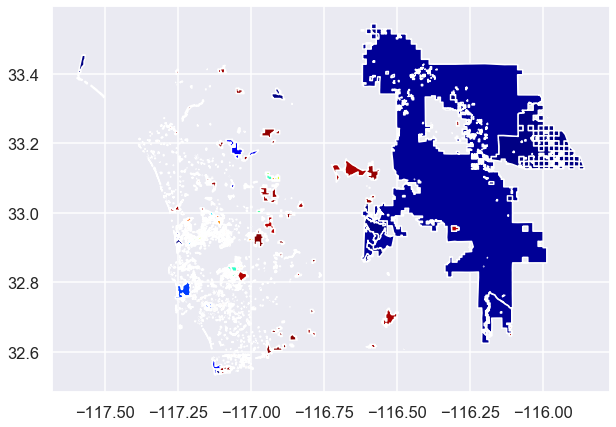

In [3]:
# show the parks data detail
# parks_df.info()
# plot this geojson data set by geopandas
parks_df.plot(figsize=(10,10), cmap="jet")
parks_df.head()

In [4]:
# drop the objectid, name, location, owner, geometry columns
parks_df = parks_df.drop(columns=['objectid', 'name', 'location','owner', 'geometry'])
# rename the alias column to name 
parks_df.rename(columns={"alias":"park_name"}, inplace=True)
parks_df.head()

,park_name,gis_acres,park_type
0,South Carlsbad State Beach,115.895878,State
1,Torrey Pines State Beach,67.294309,State
2,Ruocco Park,3.312526,Local
3,Tuna Harbor Park,0.639035,Local
4,San Diego Bayfront Park,3.669272,Local


,objectid,rec_bldg,park_name,address,zip,sq_ft,year_built,serv_dist,adult_ctr,comfort_st,...,stage,teen_ctr,tinytot_rm,weight_rm,current_cd,fy13_cd,facility_n,thomas_bro,community,geometry
0,2935,Scripps Ranch Rec Center,Scripps Ranch Community Park,11454 Blue Cypress Dr,92131,12080,2000,40,0,0,...,0,0,0,0,5,5,10279,1210-A2,MIRAMAR RANCH NORTH,POINT (-117.07986 32.92867)
1,2936,North Park Rec Center,North Park Community Park,4044 Idaho St,92104,11230,1947,41,1,0,...,0,1,1,0,3,3,488,1269-D5,NORTH PARK,POINT (-117.13418 32.75090)
2,2937,Southcrest Rec Center,Southcrest Community Park,4149 Newton Av,92113,10620,1964,43,0,0,...,0,1,0,1,8,9,299,1289-H6,SOUTHCREST,POINT (-117.10459 32.69427)
3,2938,Azalea Rec Center,Azalea Neighborhood Park,2596 Violet St,92105,1790,1973,41,0,0,...,0,0,0,0,3,9,1072,1269-H7,AZALEA/HOLLYWOOD PARK,POINT (-117.10817 32.73236)
4,2939,Colina Del Sol Rec Center,Colina Del Sol Community Park,5319 Orange Av,92115,6560,1962,41,0,0,...,0,0,0,0,7,9,491,1269-H4,COLINA DEL SOL,POINT (-117.08012 32.75282)


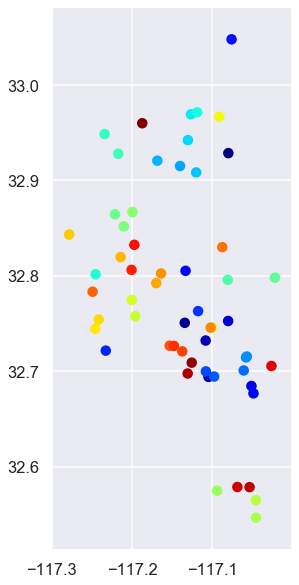

In [5]:
# show the recreation data detail
# rec_df.info()
# plot this geojson data set by geopandas
rec_df.plot(figsize=(10,10), cmap="jet")
rec_df.head()

In [6]:
# drop the unvailable columns
rec_df = rec_df.drop(columns=['objectid', 'rec_bldg', 'address', 'zip', 'sq_ft', 'kiln', 'kiln_rm', 'multp_rm', 'teen_ctr', 'tinytot_rm', 'weight_rm', 'current_cd', 'fy13_cd', 'racqb_ct', 'serv_dist', 'thomas_bro', 'community', 'geometry'])
rec_df.head()

,park_name,year_built,adult_ctr,comfort_st,comp_rm,dance_rm,game_rm,gymnasium,kitchen,stage,facility_n
0,Scripps Ranch Community Park,2000,0,0,0,0,0,1,1,0,10279
1,North Park Community Park,1947,1,0,0,1,1,1,1,0,488
2,Southcrest Community Park,1964,0,0,0,0,1,1,1,0,299
3,Azalea Neighborhood Park,1973,0,0,1,0,0,0,1,0,1072
4,Colina Del Sol Community Park,1962,0,0,0,0,1,1,1,0,491


In [7]:
# # drop the gis_acres column to ensure every one are unique
# merge_parks_df = parks_df.drop(columns=['gis_acres'])
# # merge the parks and the recreation data sets
# parks_rec_df = pd.merge(merge_parks_df, rec_df, on='park_name')
# parks_rec_df.head()

,objectid,name,facility,school_dis,city_acres,dist_acres,enhanced,strt_date,term_yrs,exp_date,...,baseb_90,softball,multi_purp,basketball,tennis_ct,sand_vball,field_ligh,comfort_st,concess_st,geometry
0,2087,Adams Elementary,Adams Avenue Community Park,San Diego Unified,1.12,1.38,N,1990-07-23,25,2015-07-23T00:00:00,...,0,1,1,0,0,0,0,0,0,"POLYGON ((-117.11740 32.76309, -117.11824 32.7..."
1,2088,Alcott Elementary,Alcott Elementary,San Diego Unified,0.00,6.11,N,2006-09-19,25,2031-09-19T00:00:00,...,0,1,1,0,0,0,0,0,0,"POLYGON ((-117.22107 32.83165, -117.22061 32.8..."
2,2089,Bayview Terrace Elementary,Bayview Terrace Elementary,San Diego Unified,0.00,3.50,N,2000-10-16,25,2025-10-10T00:00:00,...,0,1,1,1,0,0,0,0,0,"MULTIPOLYGON (((-117.22259 32.80191, -117.2226..."
3,2090,Bird Rock Elementary,Bird Rock Neighborhood Park,San Diego Unified,0.70,1.09,Y,2005-05-03,25,2030-05-03T00:00:00,...,0,1,1,1,0,0,0,0,0,"MULTIPOLYGON (((-117.26283 32.81082, -117.2626..."
4,2091,Black Mountain Middle School,Black Mountain Middle,San Diego Unified,0.00,1.60,N,1990-06-11,50,2040-05-29T00:00:00,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-117.12547 32.96962, -117.12537 32.9..."


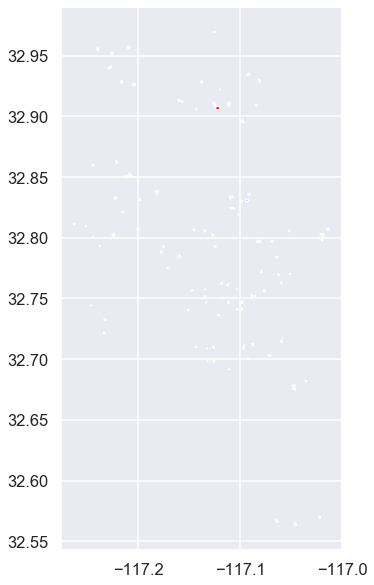

In [8]:
# show the joint use data detail
# joint_df.info()
# plot this geojson data set by geopandas
joint_df.plot(figsize=(10,10), cmap="jet")
joint_df.head()

In [9]:
# drop unvailable columns
joint_df = joint_df.drop(columns=['objectid', 'name', 'address', 'school_dis', 'community', 'notes', 'city_acres', 'dist_acres', 'enhanced', 'strt_date', 'term_yrs', 'exp_date', 'geometry'])
joint_df.head()

,facility,council_di,serv_dist,playground,tot_lot,playg_inst,baseb_50_6,baseb_90,softball,multi_purp,basketball,tennis_ct,sand_vball,field_ligh,comfort_st,concess_st
0,Adams Avenue Community Park,0,41,1,0,0,0,0,1,1,0,0,0,0,0,0
1,Alcott Elementary,0,44,1,1,0,0,0,1,1,0,0,0,0,0,0
2,Bayview Terrace Elementary,0,44,1,0,0,1,0,1,1,1,0,0,0,0,0
3,Bird Rock Neighborhood Park,0,44,1,0,0,0,0,1,1,1,0,0,0,0,0
4,Black Mountain Middle,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0


# Data Analysis & Results

In [10]:
parks_df.sort_values(by='gis_acres', ascending=False).head()

,park_name,gis_acres,park_type
60,Anza-Borrego Desert State Park,622526.697585,State
12,Anza-Borrego Desert State Wilderness,321408.106634,State
9,Santa Rosa Mountains State Wilderness,136644.079477,State
17,Ocotillo Wells SVRA,55708.169330,State
13,Coyote Canyon Cultural Preserve,29708.376903,State


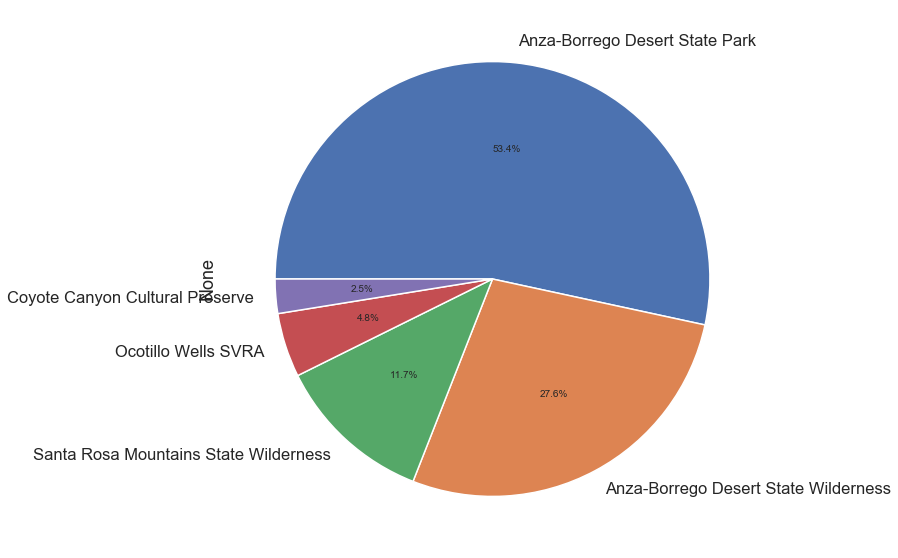

In [11]:
# find the top 5 parks has the highest gis acres
top5_parks_df = parks_df.sort_values(by='gis_acres', ascending=False).head(5)
# create a new DataFrame used to plot the bar diagram
df = pd.DataFrame(top5_parks_df[['gis_acres']])
# use the park_name columns to replace the default index
df.index = top5_parks_df[['park_name'][0]]
# draw the top5 pie diagram
data = {}
for i in df.index:
    data[str(i)] = int(df.loc[i,:])
data1 = pd.Series(data)
data1.plot(kind="pie", 
           figsize=(10,10),
           autopct='%.1f%%', # Add value label to pie chart
           radius = 1, # Sets the radius of the pie
           startangle = 180, # Set the initial angle of the pie chart
           counterclock = False, # Set the order of the pie chart to clockwise
          )

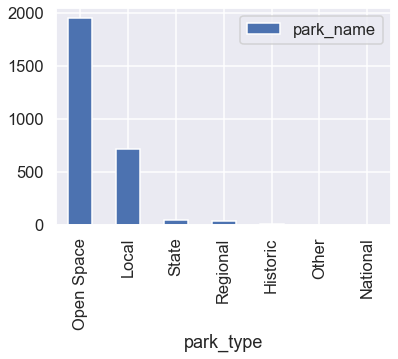

In [12]:
# get the parka_tyep and the park_name
ptn_df = parks_df[['park_type','park_name']]
# Count the number of various types of parks and order by descending
sorted_ptn_df = ptn_df.groupby('park_type').count().sort_values(by='park_name', ascending=False)
# plot its bar diagram
sorted_ptn_df.plot(kind="bar")

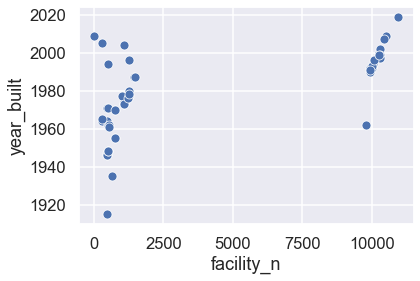

In [13]:
# sns.pairplot(rec_df)
# draw the relationship between the year and the facility
sns.scatterplot(x = rec_df['facility_n'], y = rec_df['year_built'])

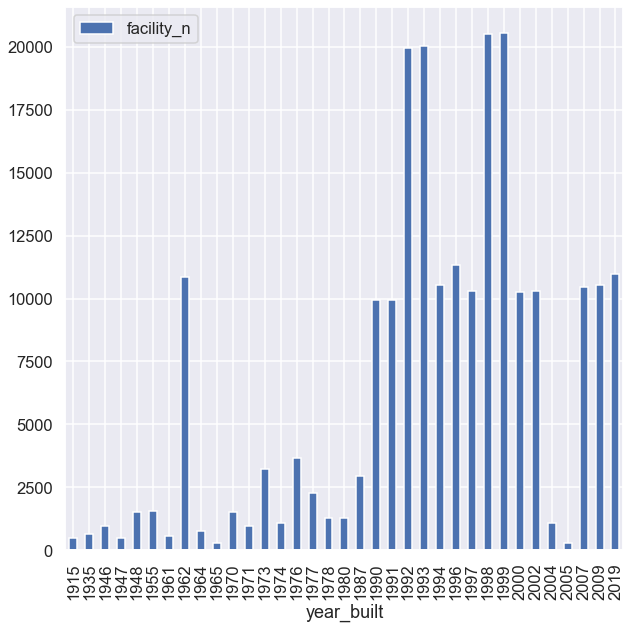

In [14]:
# to see the facility quantity built in each year
new_rec_df = rec_df[['year_built', 'facility_n']].groupby('year_built').sum()
new_rec_df.sort_index()
new_rec_df.plot(kind='bar', figsize=(10,10))

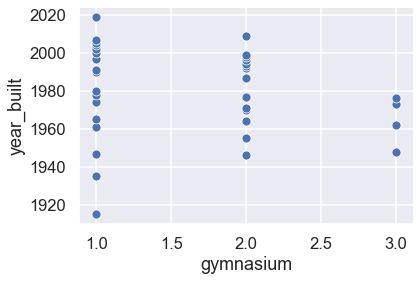

In [15]:
# draw the developing trend of the gymnasium as time goes on
new_rec_df = rec_df[['gymnasium','year_built']].groupby('year_built').count()
sns.scatterplot(x = new_rec_df['gymnasium'], y = new_rec_df.index)

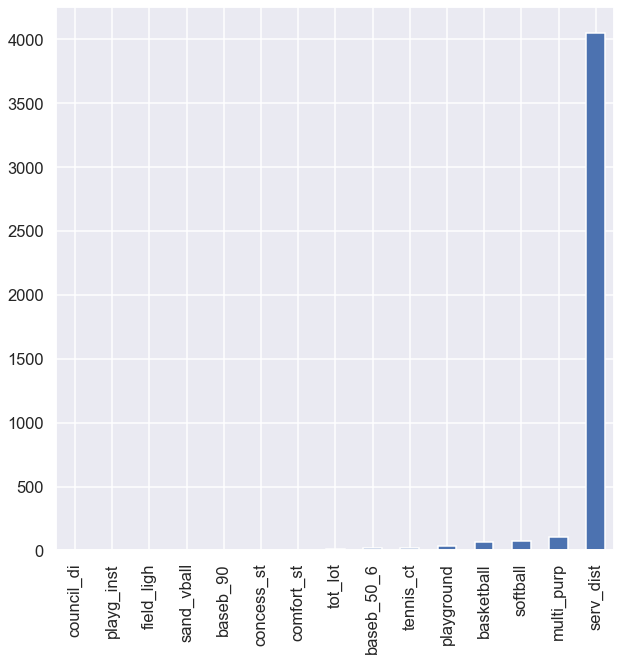

In [16]:
# to see the distribution quantity of all the facilities in each parks
# firstly, group by the facility name and then count the qunatity of each facility
df1 = joint_df.groupby('facility')
# count the sum
df2 = df1.sum().apply(lambda x: x.sum())
# order
sorted_df = df2.sort_values()
# draw its bar
sorted_df.plot(kind="bar", figsize=(10,10))

# Ethics & Privacy

I think these information will be allowed to use for my project. Since this is a public issues, it need to be solve in order to help our young generation engage in outdoor activities in parks.

Dataset which we collected from each household will be maintain private if there is any personal information such as name and address info. As long as we don't reveal the name&address, it is acceptable to show the occupation and work avaibility.

The potential biases in my dataset probably will influency by the unparticipant which result in less observation. We respect to those household which are not will to provide the information, but we highly recommend parents to help in this events to engage their children to outdoor activities in public park.

We should let our citizen pay more attention to their child physical health, and let them participate in the data collecting event.

# Conclusion & Discussion¶

Now, all the analysis based on the specified data sets have finished. Here I would answer the questions raised by me above.
The Open Space parks has the most qunatities. With the development of science and technology, the quantities of the recreation are increasing as time goes on and the speed increasing is very fast. It could conclude that more and more people enjoy the happy recreation gives.

Meanwhile, I pay a special attention on the sports and count the total quantities of the gymnasiums, I have found that the sports have developed rapidly with the improvement of living standards.

Finally, I found that the service region are always the most hot as time goes on which indicate this region would be also developed better and better.